In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soil-classification/soil_classification-2025/sample_submission.csv
/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv
/kaggle/input/soil-classification/soil_classification-2025/test_ids.csv
/kaggle/input/soil-classification/soil_classification-2025/test/img_0f035b97.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_f13af256.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_15b41dbc.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_cfb4fc7a.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_683111fb.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_c4bd7b3e.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_4ccce0f8.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_86faa98d.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_c448342c.jpg
/kaggle/input/soil-classification/soil_cla

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/kaggle/input/soilclass/soilclassification/train_labels1.csv')  # Replace with your CSV path
print(df.head())  # Check if data is loaded correctly

           image_id      soil_type
0  img_ed005410.jpg  Alluvial soil
1  img_0c5ecd2a.jpg  Alluvial soil
2  img_ed713bb5.jpg  Alluvial soil
3  img_12c58874.jpg  Alluvial soil
4  img_eff357af.jpg  Alluvial soil


In [3]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and validation (20%)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print("Training samples:", len(train_df))
print("Validation samples:", len(val_df))

Training samples: 977
Validation samples: 245


In [4]:
# ============ IMPORTS ============
import pandas as pd
import numpy as np
import pickle  # For saving class indices
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============ LOAD DATA ============
train_df = pd.read_csv('/kaggle/input/soilclass/soilclassification/train_labels1.csv')
val_df = train_df.sample(frac=0.2, random_state=42)  # Simple validation split

# ============ CREATE GENERATORS ============
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/soilclass/soilclassification/train',
    x_col='image_id',
    y_col='soil_type',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/kaggle/input/soilclass/soilclassification/train',
    x_col='image_id',
    y_col='soil_type',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# ============ SAVE CLASS INDICES ============
with open('class_indicesx.pkl', 'wb') as f:
    pickle.dump(train_generator.class_indices, f)
print("Class indices saved. Class mapping:", train_generator.class_indices)

# ============ BUILD MODEL ============
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ============ TRAIN MODEL ============
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=val_generator
)

# ============ SAVE MODEL ============
model.save('soil_classifierx1fi.h5')
print("Model and class indices saved. Download:")
print("- soil_classifierx111.h5")
print("- class_indicesx1.pkl")

2025-05-25 07:01:26.565682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748156487.048263      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748156487.166451      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1222 validated image filenames belonging to 4 classes.
Found 244 validated image filenames belonging to 4 classes.
Class indices saved. Class mapping: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748156508.645321      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748156508.646154      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can i

Epoch 1/80


I0000 00:00:1748156514.798023     100 service.cc:148] XLA service 0x7ad678003af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748156514.799485     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748156514.799512     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748156515.169041     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/39 ━━━━━━━━━━━━━━━━━━━━ 4:22 7s/step - accuracy: 0.2812 - loss: 1.4616

I0000 00:00:1748156519.030324     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 0.5551 - loss: 1.7999 - val_accuracy: 0.6270 - val_loss: 1.5447
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 380ms/step - accuracy: 0.8119 - loss: 0.4477 - val_accuracy: 0.8033 - val_loss: 0.4499
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 377ms/step - accuracy: 0.8574 - loss: 0.3637 - val_accuracy: 0.8320 - val_loss: 0.7003
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 376ms/step - accuracy: 0.8629 - loss: 0.3330 - val_accuracy: 0.8197 - val_loss: 0.7169
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.8833 - loss: 0.3032 - val_accuracy: 0.8402 - val_loss: 0.4557
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - accuracy: 0.8609 - loss: 0.3522 - val_accuracy: 0.8934 - val_loss: 0.3407
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 371ms/step - accuracy: 0.9047 - loss: 0.2344 - val_accuracy: 0.9016 - val_loss: 0.2717
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 376ms/step - accuracy: 0.8900 - loss: 0.2831 - val_accuracy: 0.918

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation (to prevent overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/soilclass/soilclassification/train',  # Update path
    x_col='image_id',  # Column with image names
    y_col='soil_type',   # Column with labels
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/kaggle/input/soilclass/soilclassification/train',
    x_col='image_id',
    y_col='soil_type',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1222 validated image filenames belonging to 4 classes.
Found 244 validated image filenames belonging to 4 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get number of classes dynamically
num_classes = len(train_generator.class_indices)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    epochs=80,  # Train for 10 rounds (increase if needed)
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 397ms/step - accuracy: 0.6284 - loss: 1.3420 - val_accuracy: 0.8320 - val_loss: 0.6282
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - accuracy: 0.8475 - loss: 0.3896 - val_accuracy: 0.8566 - val_loss: 0.4481
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - accuracy: 0.8652 - loss: 0.3174 - val_accuracy: 0.8525 - val_loss: 0.4086
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 377ms/step - accuracy: 0.8753 - loss: 0.3120 - val_accuracy: 0.9057 - val_loss: 0.2724
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 375ms/step - accuracy: 0.9038 - loss: 0.2448 - val_accuracy: 0.9057 - val_loss: 0.3235
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 384ms/step - accuracy: 0.9221 - loss: 0.2092 - val_accuracy: 0.8402 - val_loss: 0.4504
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - accuracy: 0.8894 - loss: 0.2392 - val_accuracy: 0.9221 - val_loss: 0.2046
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.9170 - loss: 0.2002 - val_accu

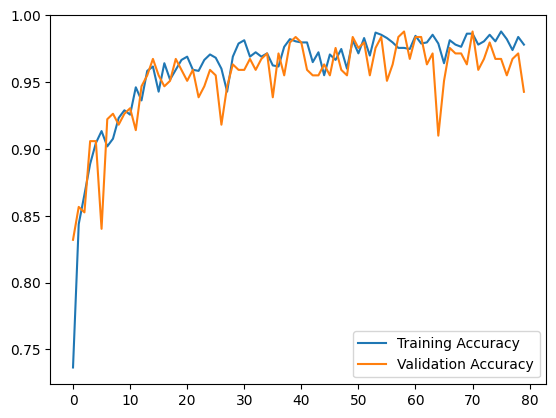

In [8]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [9]:
model.save('soil_classifierrx3final.h5')
print("Model and class indices saved. Download:")

Model and class indices saved. Download:


In [10]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.9474 - loss: 0.1237
Validation Accuracy: 94.26%


In [11]:
from IPython.display import FileLink
FileLink('soil_classifierrx3ffinal.h5')  # Click the link that appears to download

/kaggle/working/soil_classifierrx3ffinal.h5